In [1]:
from datasets import load_dataset_builder
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds_builder = load_dataset_builder("speech_commands", "v0.01")

In [3]:
dict(enumerate(ds_builder.info.features["label"].names, 0)) #labels

{0: 'yes',
 1: 'no',
 2: 'up',
 3: 'down',
 4: 'left',
 5: 'right',
 6: 'on',
 7: 'off',
 8: 'stop',
 9: 'go',
 10: 'zero',
 11: 'one',
 12: 'two',
 13: 'three',
 14: 'four',
 15: 'five',
 16: 'six',
 17: 'seven',
 18: 'eight',
 19: 'nine',
 20: 'bed',
 21: 'bird',
 22: 'cat',
 23: 'dog',
 24: 'happy',
 25: 'house',
 26: 'marvin',
 27: 'sheila',
 28: 'tree',
 29: 'wow',
 30: '_silence_'}

In [4]:
dataset_train = load_dataset("speech_commands", "v0.01", split="test") #train or test

Found cached dataset speech_commands (/root/.cache/huggingface/datasets/speech_commands/v0.01/0.1.0/ba3d9a6cf49aa1313c51abe16b59203451482ccb9fee6d23c94fecabf3e206da)


(array([256., 252., 272., 253., 267., 259., 246., 262., 249., 251.,  13.,
         16.,  16.,  15.,   9.,  23.,  11.,  16.,  16.,  25.,   8.,  10.,
          9.,  10.,  13.,   6.,  12.,   9.,  10.,  10., 257.]),
 array([ 0.        ,  0.96774194,  1.93548387,  2.90322581,  3.87096774,
         4.83870968,  5.80645161,  6.77419355,  7.74193548,  8.70967742,
         9.67741935, 10.64516129, 11.61290323, 12.58064516, 13.5483871 ,
        14.51612903, 15.48387097, 16.4516129 , 17.41935484, 18.38709677,
        19.35483871, 20.32258065, 21.29032258, 22.25806452, 23.22580645,
        24.19354839, 25.16129032, 26.12903226, 27.09677419, 28.06451613,
        29.03225806, 30.        ]),
 <BarContainer object of 31 artists>)

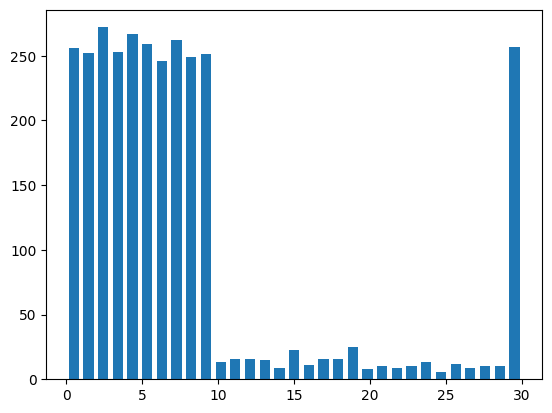

In [5]:
plt.hist(dataset_train["label"], bins=31, rwidth=0.7) # histogram occurencies per label

In [6]:
set([x["sampling_rate"] for x in dataset_train["audio"]]) #how many different sampling rates

{16000}

In [7]:
vals, counts = np.unique([len(x["array"]) for x in dataset_train["audio"]], return_counts=True)
print("Audio below 16K samples: " + str(sum([c for v, c in zip(vals, counts) if v < 16000])))
print("Audio equal 16K samples: " + str(sum([c for v, c in zip(vals, counts) if v == 16000])))
print("Audio above 16K samples: " + str(sum([c for v, c in zip(vals, counts) if v > 16000])))

Audio below 16K samples: 0
Audio equal 16K samples: 3081
Audio above 16K samples: 0


In [8]:
silences = [x for x in dataset_train if x["label"] == 30]
silence_lenghts = [len(x["audio"]["array"]) for x in silences]
print([len(x["audio"]["array"]) for x in silences]) # silence records requires splincing to ensure they are up to 16K for normalization
print(sum(silence_lenghts))

[16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000

In [9]:
lens_below_16K = [x for x in [len(x["array"]) for x in dataset_train["audio"]] if x < 16000]
print(f"mean: {np.mean(lens_below_16K)}, std: {np.std(lens_below_16K)}, min: {np.min(lens_below_16K)}")
plt.hist(lens_below_16K) # add padding for these examples

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: zero-size array to reduction operation minimum which has no identity